# Objective: Create plots of stellar mass vs. conditional mass function

In [6]:
import os

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from astropy.io.ascii import read
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
import fitsio
import seaborn

In [58]:
# Reading in the RedMaPPer iSEDfit catalog.
rmpath = os.path.join(os.sep, 'global', 'work', 'projects', 'redmapper')
rmcatfile = os.path.join(rmpath, 'redmapper_isedfit_v5.10_centrals.fits.gz')
rminfo = fitsio.FITS(rmcatfile)
rmcat = rminfo[1].read(columns=['Z', 'MSTAR_50', 'ILUM', 'LAMBDA_CHISQ'])

In [59]:
# This function accepts two 1x2 arrays. The first is the richness bounds. The second is the redshift bounds.
def cutter(lbounds, zbounds):
    keep = np.where((rmcat['LAMBDA_CHISQ'] > lbounds[0]) * (rmcat['LAMBDA_CHISQ'] < lbounds[1]) * 
                    (rmcat['Z'] > zbounds[0]) * (rmcat['Z'] < zbounds[1]))[0]
    return keep

In [60]:
# Goal: Create some clean subplots, reminiscent of those in the paper (but better).
# How do I compute the Conditional Mass Function (CMF)?
# Create little slices of richness and redshift.
# Compute the volume of the little slices of Z, RA, Dec.
# Figure out which sources are in each slice.
# Compute the CMF of each slice of heavenly goodness.
# Plot CMF vs. M*.

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


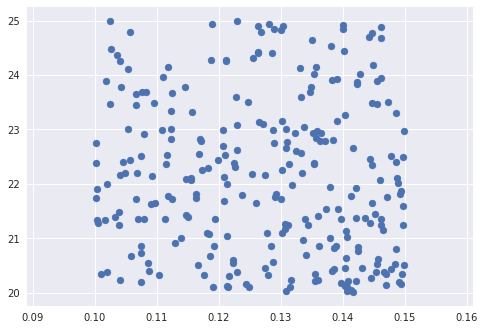

In [61]:
keep = cutter([20, 25], [0.1, 0.15])
fig, ax = plt.subplots()
ax.scatter(rmcat['Z'][keep], rmcat['LAMBDA_CHISQ'][keep])